# Regression
I den här notebooken gör vi en första introduktion till regression
- Vi kommer att använda oss av sklearn igen

In [2]:
# Importiamo le librerie necessarie
import numpy as np 
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
# applichiamo uno stile piacevole alla vista e settiamo i parametri di visualizzazione
plt.style.use("ggplot")
rcParams['figure.figsize'] = (12,  6)


In [3]:
# Carichiamo il dataset
df = pd.read_csv('data.csv')
df

,input_var,output_var
0,0.259610,0.369429
1,0.817448,4.493855
2,0.181946,2.284587
3,0.231826,2.881253
4,0.239275,3.359182
...,...,...
95,0.885114,5.376713
96,0.465091,2.251863
97,0.128731,2.104805
98,0.617066,4.985171


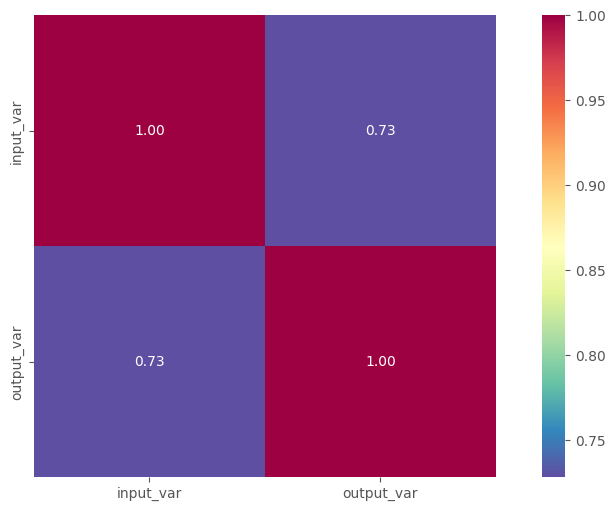

In [17]:
# Visualizziamo le correlazioni tra le variabili
corrmat = df.corr(method="pearson")
hm = sns.heatmap(corrmat, 
                 cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 10}, 
                 yticklabels=df.columns, 
                 xticklabels=df.columns, 
                 cmap="Spectral_r")
plt.show()

In [5]:
# definiamo le variabili di input e di output
in_var = df['input_var'].to_numpy()
out_var = df['output_var'].to_numpy()

In [6]:
# adeguiamo la forma dei dati per poter usare la regressione lineare di sklearn
# occorre dare in input un array 2D con una colonna per ogni variabile di input
# e una riga per ogni osservazione

in_var = in_var.reshape(-1,1)
out_var = out_var.reshape(-1,1)

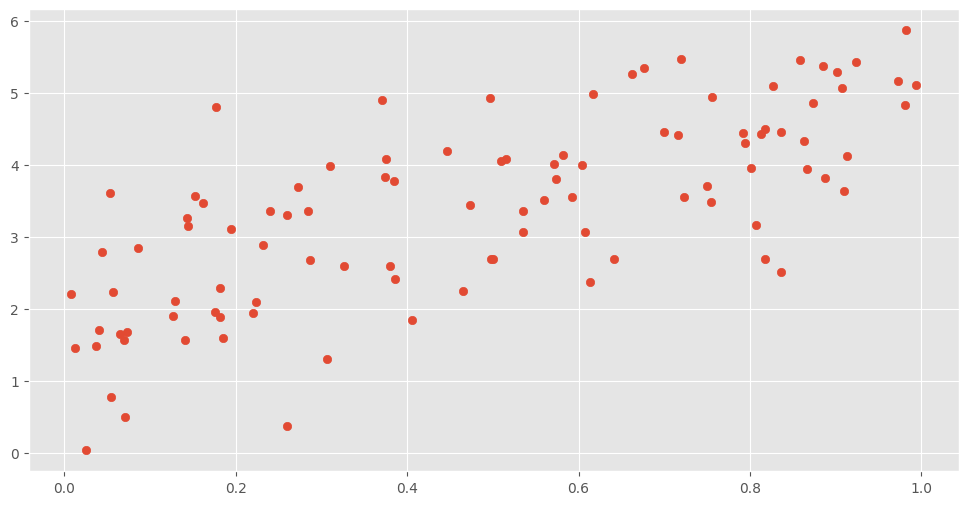

In [7]:
# Rappresentiamo i dati in un grafico a dispersione (scatter plot)
plt.scatter(in_var,out_var)

In [8]:
# Creiamo un modello di regressione lineare con sklearn
lr_model = LinearRegression() 

In [9]:
# Addestriamo il modello con i dati di input e output 
# usando il metodo fit() del modello
lr_model.fit(in_var, out_var)

LinearRegression()

In [10]:
# Facciamo una predizione con il modello addestrato calcolando 
# il coefficiente angolare e l'intercetta della retta
k = lr_model.coef_
m = lr_model.intercept_

print("Coefficiente angolare: ", k)
print("Intercetta: ", m)
print("la retta di regressione è: y = ", round(k[0][0], 2), "x + ", round(m[0], 2))

Coefficiente angolare:  [[3.12319396]]
Intercetta:  [1.87680389]
la retta di regressione è: y =  3.12 x +  1.88


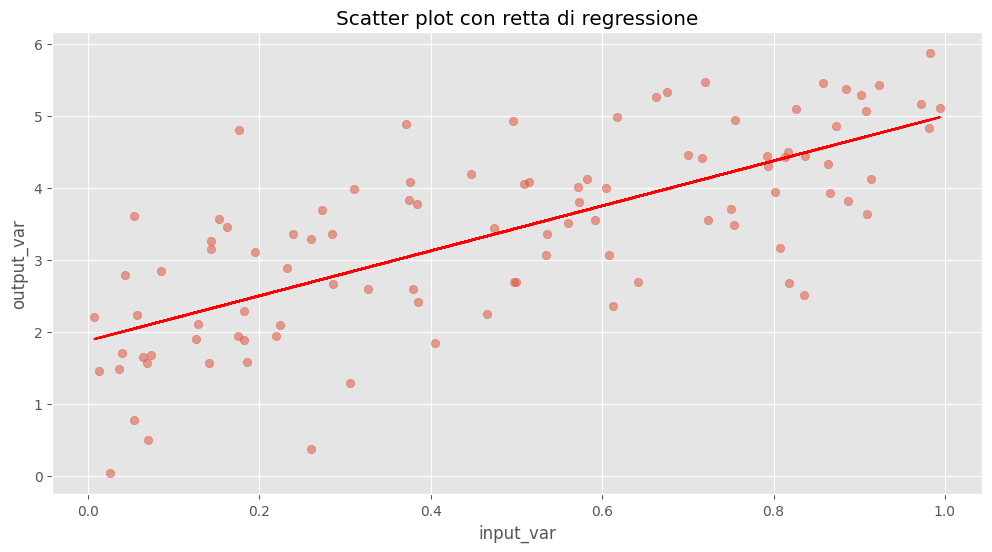

In [11]:
# Calcoliamo i valori predetti dal modello
out_var_pred = lr_model.predict(in_var)

# Rappresentiamo la retta di regressione nel grafico a dispersione
plt.scatter(in_var, out_var, alpha=0.5)
plt.title('Scatter plot con retta di regressione')
plt.xlabel('input_var')
plt.ylabel('output_var')
plt.plot(in_var, out_var_pred, color = "red")


In [16]:
# Calcoliamo i coefficienti di determinazione R^2, l'errore medio quadratico e l'errore medio assoluto del dataset
# che è una misura di bontà del modello usando il metodo score() del modello
r2 = lr_model.score(in_var, out_var)
print("R^2: ", round(r2, 2))

mse = mean_squared_error(in_var, out_var)
print("Errore medio quadratico: ", mse)

mae = mean_absolute_error(in_var, out_var)
print("Errore medio assoluto: ", mae)



R^2:  0.53
Errore medio quadratico:  9.588202465736195
Errore medio assoluto:  2.894586835312637
